# Data Science Internship  LetsGrowMore

# NAME - SAROJ SAH

# TASK-2 Prediction Using Decision Tree Algorithm

The dataset given is iris.csv and we have to implement decision tree algorithm in order to predict the species for the data taken as input..

# Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
%matplotlib inline

# Upload the dataset

In [3]:
# Reading dataset which is in a .csv file
iris_df = pd.read_csv('iris.csv')

In [4]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#Outputs the number of entries and the number of features in a dataset
iris_df.shape

(150, 6)

In [9]:
#Lists out the name of the features in the iris dataset
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [11]:
#Displaying the number of entries in each of the features in the iris dataset
iris_df.count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [12]:
#Checking if there exixts null values in any of the six columns
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# General Visualisation of the Iris Dataset

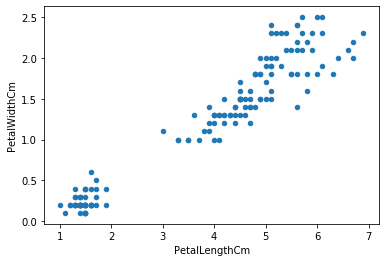

In [13]:
# 2-D Scatter Plot which takes two features out of the four one at one axis and the other at another y axis
iris_df.plot(kind='scatter', x = 'PetalLengthCm', y = 'PetalWidthCm')
plt.show()

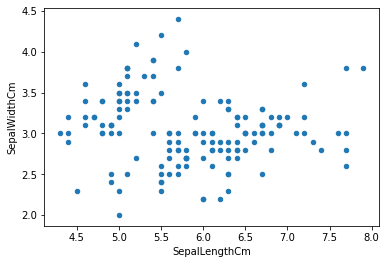

In [14]:
# Similarly plotting the rest of two features to observe the petal-width correspoding to petal-length
iris_df.plot(kind='scatter', x = 'SepalLengthCm', y = 'SepalWidthCm')
plt.show()

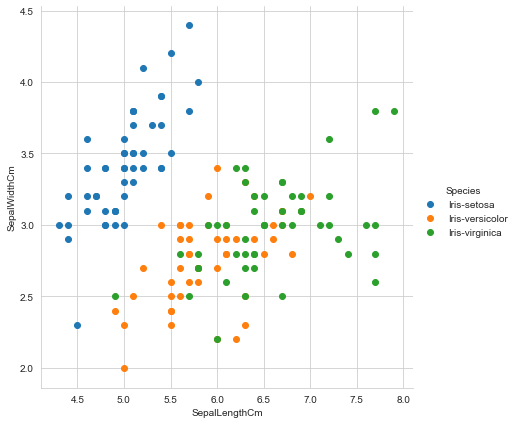

In [15]:
#drawing scatter plot using seaborn and observing the different species with dissimilar colours
sns.set_style('whitegrid');
sns.FacetGrid(iris_df, hue="Species", height=6) \
    .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
    .add_legend();
plt.show()

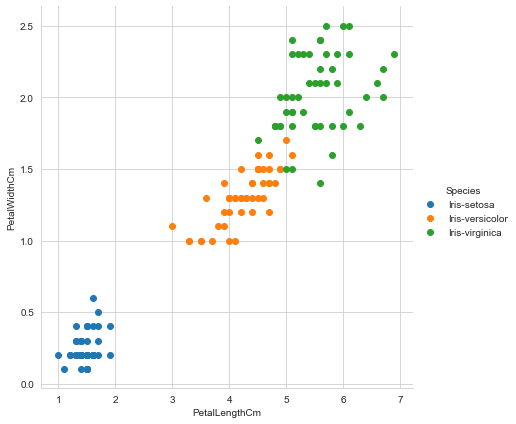

In [16]:
sns.set_style('whitegrid');
sns.FacetGrid(iris_df, hue="Species", height=6) \
    .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
    .add_legend();
plt.show()

Accordint to this plot, the Iris-Setosa flowers can be well defined with the following two illustrations of features i.e. PetalLengthCm <= 2 and PetalWidthCm <= 1. There is some overlap with the Iris-versicolor and Iris-virginica classes.

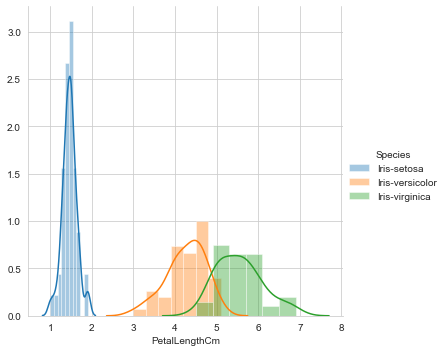

In [18]:
#Distribution PLot
sns.FacetGrid(iris_df, hue="Species", height=5) \
    .map(sns.distplot, 'PetalLengthCm') \
    .add_legend()
plt.show()

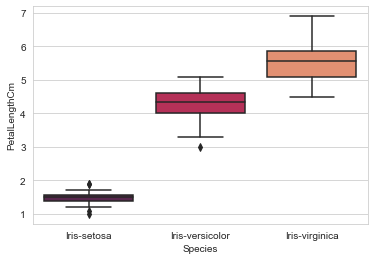

In [19]:
#Box Plot
sns.boxplot(data=iris_df, x="Species", y="PetalLengthCm", palette='rocket')
plt.show()

According to the boxplot obtained, 25 percentile of  versicolor species have PetalLength of 4cm and the whiskers for the relevant boxplot shows the minimum and maximum PetalLength possessed by the respective Iris Flowers. 

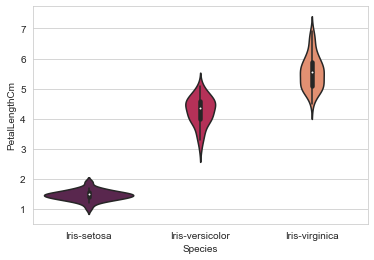

In [21]:
#Violin Plot
sns.violinplot(data=iris_df, x="Species", y="PetalLengthCm", height=5, palette='rocket')
plt.show()

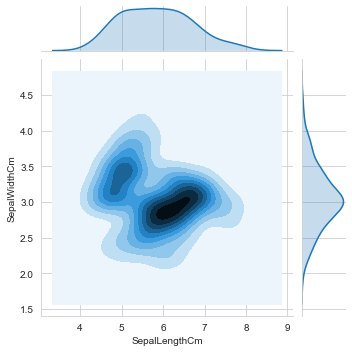

In [22]:
#Joint PLot
sns.jointplot( data=iris_df, x="SepalLengthCm", y="SepalWidthCm", height=5, kind='kde')
plt.show()

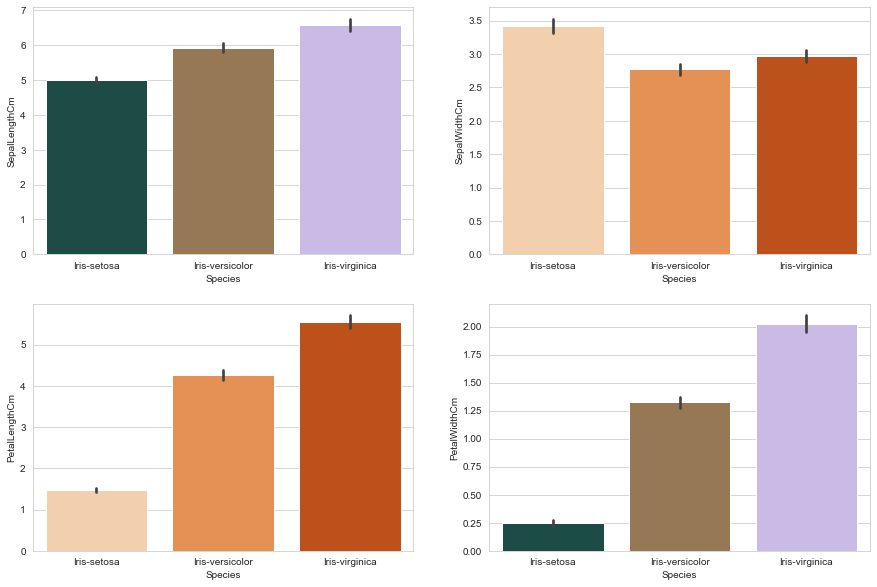

In [23]:
#Bar Plots
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'Species', y = 'SepalLengthCm', data = iris_df, palette="cubehelix")
plt.subplot(2,2,2)
sns.barplot(x = 'Species', y = 'SepalWidthCm', data = iris_df, palette="Oranges")
plt.subplot(2,2,3)
sns.barplot(x = 'Species', y = 'PetalLengthCm', data = iris_df, palette="Oranges")
plt.subplot(2,2,4)
sns.barplot(x = 'Species', y = 'PetalWidthCm', data = iris_df, palette="cubehelix")

These four plots shows the different range of the Species of the iris flowers corresponding to each of the features.

In [24]:
x_df = iris_df.drop(columns='Species')
x_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [25]:
y_df = iris_df['Species']
y_df.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

# Splitting the Data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_df_train, x_df_test,y_df_train,y_df_test = train_test_split(x_df,y_df,test_size=0.25,random_state=0)

In [28]:
print(len(x_df_train))
print(len(x_df_test))
print(len(y_df_train))
print(len(y_df_test))

112
38
112
38


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
x_df_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
61,62,5.9,3.0,4.2,1.5
92,93,5.8,2.6,4.0,1.2
112,113,6.8,3.0,5.5,2.1
2,3,4.7,3.2,1.3,0.2
141,142,6.9,3.1,5.1,2.3
...,...,...,...,...,...
9,10,4.9,3.1,1.5,0.1
103,104,6.3,2.9,5.6,1.8
67,68,5.8,2.7,4.1,1.0
117,118,7.7,3.8,6.7,2.2


In [31]:
y_df_train

61     Iris-versicolor
92     Iris-versicolor
112     Iris-virginica
2          Iris-setosa
141     Iris-virginica
            ...       
9          Iris-setosa
103     Iris-virginica
67     Iris-versicolor
117     Iris-virginica
47         Iris-setosa
Name: Species, Length: 112, dtype: object

# Decision Tree Algorithm

Applying decision tree classifier in order to check the degree of accuracy in the classification

In [37]:
iris_classifier = tree.DecisionTreeClassifier()
iris_classifier.fit(x_df_train, y_df_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(200.88000000000002, 181.2, 'X[0] <= 101.0\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(133.92000000000002, 108.72, 'X[3] <= 2.35\ngini = 0.499\nsamples = 71\nvalue = [37, 34, 0]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41]')]

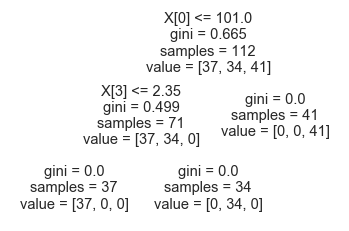

In [38]:
tree.plot_tree(iris_classifier)

In [39]:
predicted_y = iris_classifier.predict(x_df_test)
print(predicted_y)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor']


# Checking different Metrics

In [40]:
# Classification Report
print(f"Classification Report: \n {classification_report(y_df_test, predicted_y)}")

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.94      1.00      0.97        16
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        38
      macro avg       0.98      0.96      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [41]:
#Accuracy
print(f'Accuracy:- \n {accuracy_score(y_df_test,predicted_y)*100}')

Accuracy:- 
 97.36842105263158
